In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

output_directory = '/home/marco/DataspellProjects/thesis/output/spot_check/ST001937/'

palette = sns.color_palette(["#2176AB", "#F97662", "#FC9B31", "#FFBF00", "#50C878", "#B284BE"])
sns.set(style="whitegrid")
sns.set_palette(palette)

df = pd.read_csv('../../data/ST001937_bm.csv')

X = df.drop(columns=['Phenotypes'])
y = df['Phenotypes']

kfold = KFold(n_splits=10, random_state=42, shuffle=True)

models = {
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
    'LDA': LinearDiscriminantAnalysis(),
    'NB': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Booster': GradientBoostingClassifier(random_state=42),
}

scores = {model_name: cross_val_score(model, X, y, cv=kfold, n_jobs=-1) for model_name, model in models.items()}

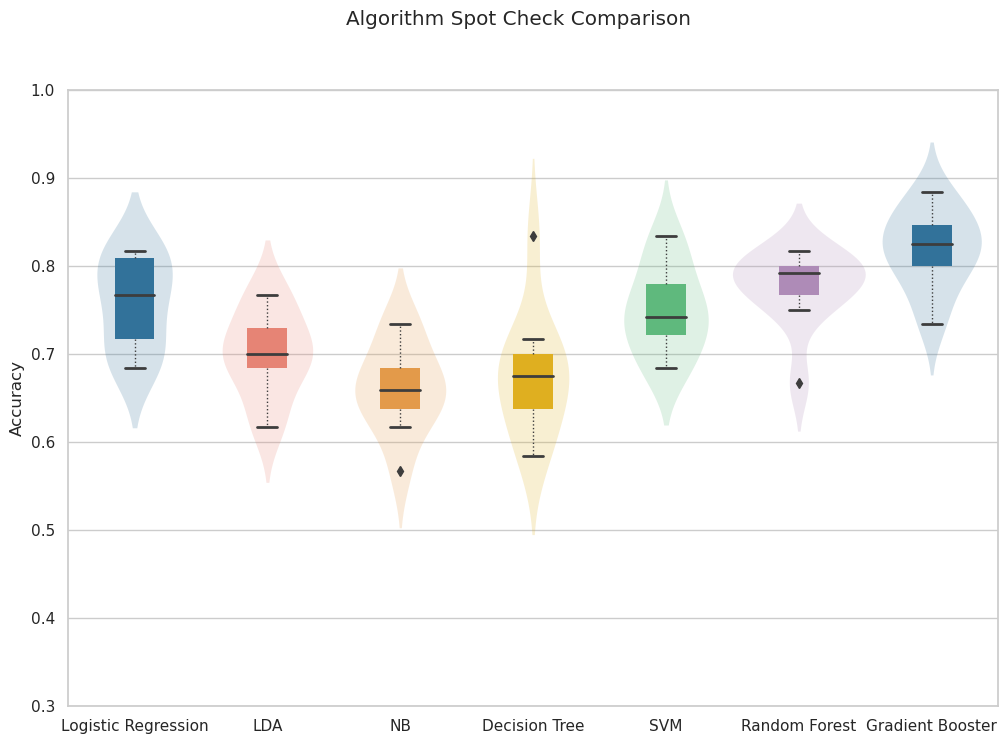

In [120]:
import numpy as np

#sort the scores
scores = {model_name: sorted(score) for model_name, score in scores.items()}

# Boxplot algorithm comparison
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Algorithm Spot Check Comparison')
ax = sns.boxplot(data=pd.DataFrame(scores), palette=palette, linewidth=0, width=0.3,
                 medianprops=dict(linestyle='-', linewidth=2),
                 boxprops=dict(linewidth=0, alpha=1),
                 whiskerprops=dict(linestyle=':', linewidth=1),
                 capprops=dict(linestyle='-', linewidth=2))
sns.violinplot(data=pd.DataFrame(scores), palette=palette, linewidth=0, alpha=0.3, ax=ax, width=1)
plt.setp(ax.collections, alpha=.2)
plt.yticks(np.arange(0.3, 1.1, 0.1))
plt.ylabel('Accuracy')
plt.savefig(output_directory + 'spot_check.png', dpi=300)
